# 第01周作业：Ames房价数据特征工程
根据房屋的特征来预测亚美尼亚州洛瓦市（Ames，Lowa）的房价。
其中房屋的特征 x 共有 79 维，响应值 y 为每个房屋的销售价格（SalePrice）。 
评价标准为预测值的对数和观测值的对数的 RMSE(Root-Mean-Squared-Error )。

## 这里读取的数据是特征工程之前的
首先对数据进行了初步探索，
然后，参考老师给的特征工程代码，进行了一遍特征工程。

## 代码版本 Python3

In [184]:
# 导入必要的工具包
import numpy as np #用于数值计算
import pandas as pd #用于数据表处理，数据文件读写
from scipy.stats import skew #查看数据分布是否对称/计算斜度

import matplotlib.pyplot as plt #用于绘图：分析结果的可视化。
import seaborn as sns #用于绘图：分析结果的可视化。封装更好。
from IPython.display import display

#应该是设置浮点数的形式格式，小数点后三位
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#这一行是干嘛的？ 设置 matplotlib 让绘制的图形出现在 Notebook 里而不是新窗口
%matplotlib inline

#读取训练数据
dpath = './data/'
data = pd.read_csv(dpath + 'Ames_House_train.csv')
data.head(3) #查看数据的前几行，默认是 5 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [142]:
data.info() #查看数据的基本信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

总共有 1460 个样本，每个样本有 81 个特征值，其中第 1 个是样本id，最后 1 个是房屋价格， 其余 79 个是房屋特征。
房屋的特征值的类型有三种： float64 , int64, object 就是字符串。
有一些特征值不够 1460 个。

In [185]:
#读取测试数据，也需要进行特征工程，数据清洗 
test = pd.read_csv(dpath + "Ames_House_test.csv")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [186]:
data.isnull().sum() #查看是否有空值

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

很多属性有缺失值，抛弃还是补齐？怎么补齐？
老师说，有的属性可根据其含义设置为缺省值，有的属性可将该属性缺失值作为一个新的取值。有的属性可以将其丢弃。
下面进行具体问题具体处理。

In [187]:
test.isnull().sum() #查看是否有空值

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         1
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQu       730
GarageType         76
GarageYrBlt        78
GarageFinish       78
GarageCars          1
GarageArea          1
GarageQual         78
GarageCond

也有很多缺失值。好，这个数据好，适合练习，哈哈哈

## 探索数据
查看数据各特征的分布，以及特征之间是否存在相关关系等冗余。

In [188]:
#对数据值型特征，用常用统计量观察其分布
#各属性的统计特性: 样本数目、均值、标准差、最小值、1/4分位数（25%）、中位数（50%）、3/4分位数（75%）、最大值
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000,1460.000,1201.000,1460.000,1460.000,1460.000,1460.000,1460.000,1452.000,1460.000,...,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000
mean,730.500,56.897,70.050,10516.828,6.099,5.575,1971.268,1984.866,103.685,443.640,...,94.245,46.660,21.954,3.410,15.061,2.759,43.489,6.322,2007.816,180921.196
std,421.610,42.301,24.285,9981.265,1.383,1.113,30.203,20.645,181.066,456.098,...,125.339,66.256,61.119,29.317,55.757,40.177,496.123,2.704,1.328,79442.503
min,1.000,20.000,21.000,1300.000,1.000,1.000,1872.000,1950.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2006.000,34900.000
25%,365.750,20.000,59.000,7553.500,5.000,5.000,1954.000,1967.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,2007.000,129975.000
50%,730.500,50.000,69.000,9478.500,6.000,5.000,1973.000,1994.000,0.000,383.500,...,0.000,25.000,0.000,0.000,0.000,0.000,0.000,6.000,2008.000,163000.000
75%,1095.250,70.000,80.000,11601.500,7.000,6.000,2000.000,2004.000,166.000,712.250,...,168.000,68.000,0.000,0.000,0.000,0.000,0.000,8.000,2009.000,214000.000
max,1460.000,190.000,313.000,215245.000,10.000,9.000,2010.000,2010.000,1600.000,5644.000,...,857.000,547.000,552.000,508.000,480.000,738.000,15500.000,12.000,2010.000,755000.000


### 单变量分布分析

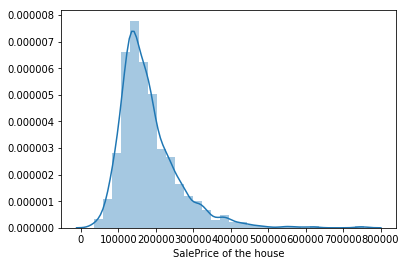

In [189]:
# 目标 y（房屋价格）的直方图／分布
fig = plt.figure()
sns.distplot(data.SalePrice.values, bins=30, kde=True)
plt.xlabel('SalePrice of the house')
plt.show()

可以看出房屋售价服从正态分布

Text(0.5,1,'Distribution of SalePrice')

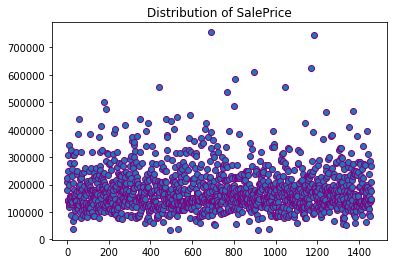

In [190]:
# 离群点检测：单个特征散点图
plt.scatter(range(data.shape[0]), data.SalePrice.values, edgecolors='purple')
plt.title('Distribution of SalePrice')

可以看出，数据大多集中在均值（180921）附近，和正态分布比较接近。
超过 700000 的样本只有两个，在模型训练时，可以考虑将 y 大于 700000 的样本当成 outliers（离群点）去掉。

In [191]:
# 剔除离群点：删除 y 大于 700000 的样本
data = data[data.SalePrice < 700000]
data.shape

(1458, 81)

In [167]:
#对类别型特征，观察其取值范围及直方图
#选择数据类型，包含 object 的类型，得到所有的属性列表 
categorical_features = data.select_dtypes(include=['object']).columns
#通过 for 循环，遍历列表，输出各个属性的信息
for col in categorical_features:
    print('\n%s 属性的不同取值和出现的次数' % col)
    print(data[col].value_counts())


MSZoning 属性的不同取值和出现的次数
RL         1149
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

Street 属性的不同取值和出现的次数
Pave    1452
Grvl       6
Name: Street, dtype: int64

Alley 属性的不同取值和出现的次数
Grvl    50
Pave    41
Name: Alley, dtype: int64

LotShape 属性的不同取值和出现的次数
Reg    925
IR1    482
IR2     41
IR3     10
Name: LotShape, dtype: int64

LandContour 属性的不同取值和出现的次数
Lvl    1309
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

Utilities 属性的不同取值和出现的次数
AllPub    1457
NoSeWa       1
Name: Utilities, dtype: int64

LotConfig 属性的不同取值和出现的次数
Inside     1052
Corner      261
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

LandSlope 属性的不同取值和出现的次数
Gtl    1380
Mod      65
Sev      13
Name: LandSlope, dtype: int64

Neighborhood 属性的不同取值和出现的次数
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51


大多数类别型特征的取值并不是很多，一些特征的取值有序关系，可以将其变换为有序数字。
其他的类别型特征可以采用独热编码（One hot encoding）/哑编码。
什么是独热编码？什么是哑编码？搜

## 输入属性的直方图／分布
对数据做适当的数据清洗（异常值处理和缺失值处理）
适当的特征工程

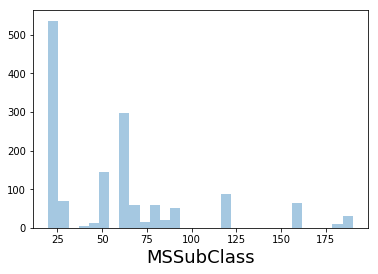

In [192]:
fig = plt.figure()
# 01 房地产建筑类别
sns.distplot(data.MSSubClass.values, bins=30, kde=False)
plt.xlabel('MSSubClass', fontsize=18)
plt.show()

这个分布和房屋售价的分布差别很大，在模型训练时，MSSubClass 这个属性可以去掉。先别去掉，谨慎。
怎么用代码去掉这个属性呢？用 drop() 方法，哈哈哈

In [193]:
# Id 这个属性对模型训练没用任何作用，可以放心删除
data.drop(['Id'], inplace=True, axis=1)
test_id = test['Id']
test.drop(['Id'], inplace=True, axis=1)

## 用散点图查看离群点

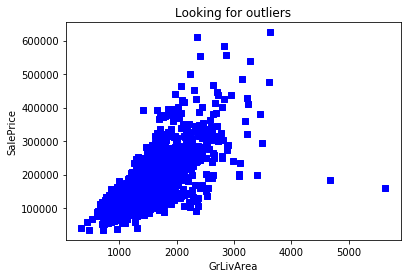

In [194]:
# 11 地上居住面积
plt.scatter(data.GrLivArea, data.SalePrice, c = "blue", marker = "s")
plt.title("Looking for outliers")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

#剔除离群点
data = data[data.GrLivArea < 4000]
temp = data.reindex()

从上图中可以看出有 2 个极端的离群点在图的右下角（面积很大，但价格很低）。
该数据集的提供者建议移除面积大于 4000 的数据点。删除了4个样本点。

In [195]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1456 non-null int64
MSZoning         1456 non-null object
LotFrontage      1197 non-null float64
LotArea          1456 non-null int64
Street           1456 non-null object
Alley            91 non-null object
LotShape         1456 non-null object
LandContour      1456 non-null object
Utilities        1456 non-null object
LotConfig        1456 non-null object
LandSlope        1456 non-null object
Neighborhood     1456 non-null object
Condition1       1456 non-null object
Condition2       1456 non-null object
BldgType         1456 non-null object
HouseStyle       1456 non-null object
OverallQual      1456 non-null int64
OverallCond      1456 non-null int64
YearBuilt        1456 non-null int64
YearRemodAdd     1456 non-null int64
RoofStyle        1456 non-null object
RoofMatl         1456 non-null object
Exterior1st      1456 non-null object
Exterior2nd      1456 non-

## 缺失值处理
有些特征，用中位数 median / 均值 mean 或众数 most common value 填充没有意义
所以，要根据每个特征的具体含义，来处理缺失值。
因为特征工程对训练集和测试集都要进行，因此我们定义成函数，将数据集以参数形式传递

In [196]:
#根据每个特征的具体含义，来处理缺失值： fillna() 填充缺失值
def process_missvalue_by_meaning(df):
    # Alley 所在巷通道的类型:  NA 表示 "没有巷通道"，用 None 填充缺失值
    df.loc[:, "Alley"] = df.loc[:, "Alley"].fillna("None")
    
    # BedroomAbvGr 地下室之上的卧室数目 : NA 很可能是 0
    df.loc[:, "BedroomAbvGr"] = df.loc[:, "BedroomAbvGr"].fillna(0)
    
    # BsmtQual 地下室高度。。。等等 : NA 表示 "没有地下室"
    df.loc[:, "BsmtQual"] = df.loc[:, "BsmtQual"].fillna("No")
    df.loc[:, "BsmtCond"] = df.loc[:, "BsmtCond"].fillna("No")
    df.loc[:, "BsmtExposure"] = df.loc[:, "BsmtExposure"].fillna("No")
    df.loc[:, "BsmtFinType1"] = df.loc[:, "BsmtFinType1"].fillna("No")
    df.loc[:, "BsmtFinType2"] = df.loc[:, "BsmtFinType2"].fillna("No")
    df.loc[:, "BsmtFullBath"] = df.loc[:, "BsmtFullBath"].fillna(0)
    df.loc[:, "BsmtHalfBath"] = df.loc[:, "BsmtHalfBath"].fillna(0)
    df.loc[:, "BsmtUnfSF"] = df.loc[:, "BsmtUnfSF"].fillna(0)
    
    # CentralAir 中央空调 : NA 很可能表示 没有
    df.loc[:, "CentralAir"] = df.loc[:, "CentralAir"].fillna("N")
    
    # Condition : NA most likely means Normal，靠近主干道或铁路
    df.loc[:, "Condition1"] = df.loc[:, "Condition1"].fillna("Norm")
    df.loc[:, "Condition2"] = df.loc[:, "Condition2"].fillna("Norm")
    
    # EnclosedPorch 封闭门廊面积 : NA 很可能表示 没有封闭门廊
    df.loc[:, "EnclosedPorch"] = df.loc[:, "EnclosedPorch"].fillna(0)
    
    # External stuff : NA most likely means average
    df.loc[:, "ExterCond"] = df.loc[:, "ExterCond"].fillna("TA")
    df.loc[:, "ExterQual"] = df.loc[:, "ExterQual"].fillna("TA")
    
    # Fence 围栏质量: NA 表示 "no fence"
    df.loc[:, "Fence"] = df.loc[:, "Fence"].fillna("No")
    
    # FireplaceQu : data description says NA means "no fireplace"
    df.loc[:, "FireplaceQu"] = df.loc[:, "FireplaceQu"].fillna("No")
    df.loc[:, "Fireplaces"] = df.loc[:, "Fireplaces"].fillna(0)
    
    # Functional : data description says NA means typical，家用（Home）功能性评级
    df.loc[:, "Functional"] = df.loc[:, "Functional"].fillna("Typ")
    
    # GarageType etc : data description says NA for garage features is "no garage"
    df.loc[:, "GarageType"] = df.loc[:, "GarageType"].fillna("No")
    df.loc[:, "GarageFinish"] = df.loc[:, "GarageFinish"].fillna("No")
    df.loc[:, "GarageQual"] = df.loc[:, "GarageQual"].fillna("No")
    df.loc[:, "GarageCond"] = df.loc[:, "GarageCond"].fillna("No")
    df.loc[:, "GarageArea"] = df.loc[:, "GarageArea"].fillna(0)
    df.loc[:, "GarageCars"] = df.loc[:, "GarageCars"].fillna(0)
    
    # HalfBath : NA most likely means no half baths above grade
    df.loc[:, "HalfBath"] = df.loc[:, "HalfBath"].fillna(0)

    # HeatingQC : NA most likely means typical
    df.loc[:, "HeatingQC"] = df.loc[:, "HeatingQC"].fillna("TA")

    # KitchenAbvGr : NA most likely means 0
    df.loc[:, "KitchenAbvGr"] = df.loc[:, "KitchenAbvGr"].fillna(0)

    # KitchenQual : NA most likely means typical
    df.loc[:, "KitchenQual"] = df.loc[:, "KitchenQual"].fillna("TA")

    # LotFrontage : NA most likely means no lot frontage
    df.loc[:, "LotFrontage"] = df.loc[:, "LotFrontage"].fillna(0)

    # LotShape : NA most likely means regular
    df.loc[:, "LotShape"] = df.loc[:, "LotShape"].fillna("Reg")

    # MasVnrType : NA most likely means no veneer，表层砌体（Masonry veneer）类型
    df.loc[:, "MasVnrType"] = df.loc[:, "MasVnrType"].fillna("None")
    df.loc[:, "MasVnrArea"] = df.loc[:, "MasVnrArea"].fillna(0)

    # MiscFeature : data description says NA means "no misc feature"
    df.loc[:, "MiscFeature"] = df.loc[:, "MiscFeature"].fillna("No")
    df.loc[:, "MiscVal"] = df.loc[:, "MiscVal"].fillna(0)

    # OpenPorchSF : NA most likely means no open porch
    df.loc[:, "OpenPorchSF"] = df.loc[:, "OpenPorchSF"].fillna(0)

    # PavedDrive : NA most likely means not paved
    df.loc[:, "PavedDrive"] = df.loc[:, "PavedDrive"].fillna("N")

    # PoolQC : data description says NA means "no pool"
    df.loc[:, "PoolQC"] = df.loc[:, "PoolQC"].fillna("No")
    df.loc[:, "PoolArea"] = df.loc[:, "PoolArea"].fillna(0)

    # SaleCondition : NA most likely means normal sale
    df.loc[:, "SaleCondition"] = df.loc[:, "SaleCondition"].fillna("Normal")

    # ScreenPorch : NA most likely means no screen porch，观景门廊
    df.loc[:, "ScreenPorch"] = df.loc[:, "ScreenPorch"].fillna(0)

    # TotRmsAbvGrd : NA most likely means 0
    df.loc[:, "TotRmsAbvGrd"] = df.loc[:, "TotRmsAbvGrd"].fillna(0)

    # Utilities : NA most likely means all public utilities
    df.loc[:, "Utilities"] = df.loc[:, "Utilities"].fillna("AllPub")

    # WoodDeckSF : NA most likely means no wood deck
    df.loc[:, "WoodDeckSF"] = df.loc[:, "WoodDeckSF"].fillna(0)
    
    return df

data = process_missvalue_by_meaning(data)
test = process_missvalue_by_meaning(test)

In [197]:
#有些数值类型的特征值，实际上是类别特征
#比如 MSSubClass：房地产建筑类别 MoSold：销售月份

def numberical2cat(df):
    '''定义函数，把数值转换为类别 '''
    df.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      }, inplace = True)

    return df
data = numberical2cat(data)
test = numberical2cat(test)

In [198]:
#如果某些类别特征是按顺序排列的，则编码为顺序数字 0,1,2，，，
def cat2numberical(df):
    df.replace({"Alley" : {"None":0, "Grvl" : 1, "Pave" : 2},
                "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                "Street" : {"Grvl" : 1, "Pave" : 2},
                "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}},
                       inplace = True
                     )
    return df
data = cat2numberical(data)
test = cat2numberical(test)

## 还可以通过以下方式创建一些新特征 :

In [199]:
# 1 简化已有特征: 合并类别
def simplify(df):
    #这个语句是想把新的数据存到 SimplOverallQual 但是没有成功
    #执行这个语句才行 df["SimplOverallQual"] = df.OverallQual
    #其实 OverallQual 的数据已经改变，可以直接用
    df["SimplOverallQual"] = df.OverallQual.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                    4 : 2, 5 : 2, 6 : 2, # average
                                                    7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                    }, inplace = True)
    df["SimplOverallCond"] = df.OverallCond.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                    4 : 2, 5 : 2, 6 : 2, # average
                                                    7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                    },inplace = True)
    df["SimplPoolQC"] = df.PoolQC.replace({1 : 1, 2 : 1, # average
                                           3 : 2, 4 : 2 # good
                                          },inplace = True)
    df["SimplGarageCond"] = df.GarageCond.replace({1 : 1, # bad
                                                2 : 1, 3 : 1, # average
                                                4 : 2, 5 : 2 # good
                                                        },inplace = True)
    df["SimplGarageQual"] = df.GarageQual.replace({1 : 1, # bad
                                                    2 : 1, 3 : 1, # average
                                                    4 : 2, 5 : 2 # good
                                                    },inplace = True)
    df["SimplFireplaceQu"] = df.FireplaceQu.replace({1 : 1, # bad
                                                           2 : 1, 3 : 1, # average
                                                           4 : 2, 5 : 2 # good
                                                          },inplace = True)
    df["SimplFireplaceQu"] = df.FireplaceQu.replace({1 : 1, # bad
                                                           2 : 1, 3 : 1, # average
                                                           4 : 2, 5 : 2 # good
                                                          },inplace = True)
    df["SimplFunctional"] = df.Functional.replace({1 : 1, 2 : 1, # bad
                                                         3 : 2, 4 : 2, # major
                                                         5 : 3, 6 : 3, 7 : 3, # minor
                                                         8 : 4 # typical
                                                        },inplace = True)
    df["SimplKitchenQual"] = df.KitchenQual.replace({1 : 1, # bad
                                                           2 : 1, 3 : 1, # average
                                                           4 : 2, 5 : 2 # good
                                                          },inplace = True)
    df["SimplHeatingQC"] = df.HeatingQC.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      },inplace = True)
    df["SimplBsmtFinType1"] = df.BsmtFinType1.replace({1 : 1, # unfinished
                                                             2 : 1, 3 : 1, # rec room
                                                             4 : 2, 5 : 2, 6 : 2 # living quarters
                                                            },inplace = True)
    df["SimplBsmtFinType2"] = df.BsmtFinType2.replace({1 : 1, # unfinished
                                                             2 : 1, 3 : 1, # rec room
                                                             4 : 2, 5 : 2, 6 : 2 # living quarters
                                                            },inplace = True)
    df["SimplBsmtCond"] = df.BsmtCond.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    },inplace = True)
    df["SimplBsmtQual"] = df.BsmtQual.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    },inplace = True)
    df["SimplExterCond"] = df.ExterCond.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      },inplace = True)
    df["SimplExterQual"] = df.ExterQual.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      },inplace = True)
    return df

data = simplify(data)
test = simplify(test)

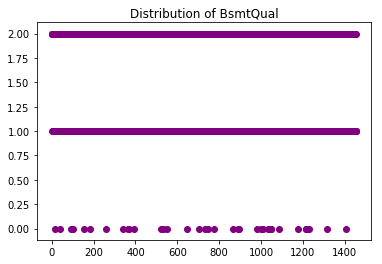

In [206]:
# 单个特征散点图：观察修改后的数据 
plt.scatter(range(data.shape[0]), data["BsmtQual"].values,color='purple')
plt.title("Distribution of BsmtQual");

In [207]:
data["SimplExterQual"] = data.ExterQual
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Data columns (total 95 columns):
MSSubClass           1456 non-null object
MSZoning             1456 non-null object
LotFrontage          1456 non-null float64
LotArea              1456 non-null int64
Street               1456 non-null int64
Alley                1456 non-null int64
LotShape             1456 non-null int64
LandContour          1456 non-null object
Utilities            1456 non-null int64
LotConfig            1456 non-null object
LandSlope            1456 non-null int64
Neighborhood         1456 non-null object
Condition1           1456 non-null object
Condition2           1456 non-null object
BldgType             1456 non-null object
HouseStyle           1456 non-null object
OverallQual          1456 non-null int64
OverallCond          1456 non-null int64
YearBuilt            1456 non-null int64
YearRemodAdd         1456 non-null int64
RoofStyle            1456 non-null object
RoofMatl            

In [210]:
#删除新增的这几个空属性
data.drop(['SimplOverallQual'], inplace=True, axis=1)
data.drop(['SimplOverallCond'], inplace=True, axis=1)
data.drop(['SimplPoolQC'], inplace=True, axis=1)
data.drop(['SimplGarageCond'], inplace=True, axis=1)
data.drop(['SimplGarageQual'], inplace=True, axis=1)
data.drop(['SimplFireplaceQu'], inplace=True, axis=1)
data.drop(['SimplFunctional'], inplace=True, axis=1)
data.drop(['SimplKitchenQual'], inplace=True, axis=1)
data.drop(['SimplHeatingQC'], inplace=True, axis=1)
data.drop(['SimplBsmtFinType1'], inplace=True, axis=1)
data.drop(['SimplBsmtFinType2'], inplace=True, axis=1)
data.drop(['SimplBsmtCond'], inplace=True, axis=1)
data.drop(['SimplBsmtQual'], inplace=True, axis=1)
data.drop(['SimplExterCond'], inplace=True, axis=1)
data.drop(['SimplExterQual'], inplace=True, axis=1)

In [ ]:
#删除新增的这几个空属性
test.drop(['SimplOverallQual'], inplace=True, axis=1)
test.drop(['SimplOverallCond'], inplace=True, axis=1)
test.drop(['SimplPoolQC'], inplace=True, axis=1)
test.drop(['SimplGarageCond'], inplace=True, axis=1)
test.drop(['SimplGarageQual'], inplace=True, axis=1)
test.drop(['SimplFireplaceQu'], inplace=True, axis=1)
test.drop(['SimplFunctional'], inplace=True, axis=1)
test.drop(['SimplKitchenQual'], inplace=True, axis=1)
test.drop(['SimplHeatingQC'], inplace=True, axis=1)
test.drop(['SimplBsmtFinType1'], inplace=True, axis=1)
test.drop(['SimplBsmtFinType2'], inplace=True, axis=1)
test.drop(['SimplBsmtCond'], inplace=True, axis=1)
test.drop(['SimplBsmtQual'], inplace=True, axis=1)
test.drop(['SimplExterCond'], inplace=True, axis=1)
test.drop(['SimplExterQual'], inplace=True, axis=1)

In [212]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1456 non-null object
MSZoning         1456 non-null object
LotFrontage      1456 non-null float64
LotArea          1456 non-null int64
Street           1456 non-null int64
Alley            1456 non-null int64
LotShape         1456 non-null int64
LandContour      1456 non-null object
Utilities        1456 non-null int64
LotConfig        1456 non-null object
LandSlope        1456 non-null int64
Neighborhood     1456 non-null object
Condition1       1456 non-null object
Condition2       1456 non-null object
BldgType         1456 non-null object
HouseStyle       1456 non-null object
OverallQual      1456 non-null int64
OverallCond      1456 non-null int64
YearBuilt        1456 non-null int64
YearRemodAdd     1456 non-null int64
RoofStyle        1456 non-null object
RoofMatl         1456 non-null object
Exterior1st      1456 non-null object
Exterior2nd      1456 non-nu

In [213]:
# 2 联合已有特征
def Combine(df):
    # Overall quality of the house 房屋的总体品质
    df["OverallGrade"] = df["OverallQual"] * df["OverallCond"]
    
    # Overall quality of the garage 车库的总体品质
    df["GarageGrade"] = df["GarageQual"] * df["GarageCond"]
    
    # Overall quality of the exterior 的总体品质
    df["ExterGrade"] = df["ExterQual"] * df["ExterCond"]
    
    # Overall kitchen score
    df["KitchenScore"] = df["KitchenAbvGr"] * df["KitchenQual"]
    
    # Overall fireplace score
    df["FireplaceScore"] = df["Fireplaces"] * df["FireplaceQu"]
    
    # Overall garage score
    df["GarageScore"] = df["GarageArea"] * df["GarageQual"]
    
    # Overall pool score
    df["PoolScore"] = df["PoolArea"] * df["PoolQC"]
    
    # Total number of bathrooms
    df["TotalBath"] = df["BsmtFullBath"] + (0.5 * df["BsmtHalfBath"]) + \
    df["FullBath"] + (0.5 * df["HalfBath"])
    
    # Total SF for house (incl. basement)
    df["AllSF"] = df["GrLivArea"] + df["TotalBsmtSF"]
    
    # Total SF for 1st + 2nd floors
    df["AllFlrsSF"] = df["1stFlrSF"] + df["2ndFlrSF"]
    
    # Total SF for porch
    df["AllPorchSF"] = df["OpenPorchSF"] + df["EnclosedPorch"] + \
    df["3SsnPorch"] + df["ScreenPorch"]
    
    # Has masonry veneer or not
    df["HasMasVnr"] = df.MasVnrType.replace({"BrkCmn" : 1, "BrkFace" : 1, "CBlock" : 1, 
                                                   "Stone" : 1, "None" : 0})
    df["HasMasVnr"] = df.MasVnrType #这样执行以下，才行
    
    # House completed before sale or not
    df["BoughtOffPlan"] = df.SaleCondition.replace({"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, 
                                                          "Family" : 0, "Normal" : 0, "Partial" : 1})
    df["BoughtOffPlan"] = df.SaleCondition #这样执行以下，才行
    
    # 删除原来的特征，避免冗余
    df.drop(['OverallQual'], inplace=True, axis=1)
    df.drop(['OverallCond'], inplace=True, axis=1)
    
    df.drop(['GarageQual'], inplace=True, axis=1)
    df.drop(['GarageCond'], inplace=True, axis=1)
    
    df.drop(['ExterQual'], inplace=True, axis=1)
    df.drop(['ExterCond'], inplace=True, axis=1)
    
    df.drop(['KitchenAbvGr'], inplace=True, axis=1)
    df.drop(['KitchenQual'], inplace=True, axis=1)
    
    df.drop(['Fireplaces'], inplace=True, axis=1)
    df.drop(['FireplaceQu'], inplace=True, axis=1)
    df.drop(['GarageArea'], inplace=True, axis=1)
    
    df.drop(['PoolArea'], inplace=True, axis=1)
    df.drop(['PoolQC'], inplace=True, axis=1)
    
    df.drop(['BsmtFullBath'], inplace=True, axis=1)
    df.drop(['BsmtHalfBath'], inplace=True, axis=1)
    df.drop(['FullBath'], inplace=True, axis=1)
    df.drop(['HalfBath'], inplace=True, axis=1)
    
    df.drop(['GrLivArea'], inplace=True, axis=1)
    df.drop(['TotalBsmtSF'], inplace=True, axis=1)
    
    df.drop(['1stFlrSF'], inplace=True, axis=1)
    df.drop(['2ndFlrSF'], inplace=True, axis=1)
    
    df.drop(['OpenPorchSF'], inplace=True, axis=1)
    df.drop(['EnclosedPorch'], inplace=True, axis=1)
    df.drop(['3SsnPorch'], inplace=True, axis=1)
    df.drop(['ScreenPorch'], inplace=True, axis=1)
    
    df.drop(['MasVnrType'], inplace=True, axis=1)
    df.drop(['SaleCondition'], inplace=True, axis=1)
    
    return df
data = Combine(data)
test = Combine(test)

In [214]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Data columns (total 66 columns):
MSSubClass        1456 non-null object
MSZoning          1456 non-null object
LotFrontage       1456 non-null float64
LotArea           1456 non-null int64
Street            1456 non-null int64
Alley             1456 non-null int64
LotShape          1456 non-null int64
LandContour       1456 non-null object
Utilities         1456 non-null int64
LotConfig         1456 non-null object
LandSlope         1456 non-null int64
Neighborhood      1456 non-null object
Condition1        1456 non-null object
Condition2        1456 non-null object
BldgType          1456 non-null object
HouseStyle        1456 non-null object
YearBuilt         1456 non-null int64
YearRemodAdd      1456 non-null int64
RoofStyle         1456 non-null object
RoofMatl          1456 non-null object
Exterior1st       1456 non-null object
Exterior2nd       1456 non-null object
MasVnrArea        1456 non-null float64
Fo

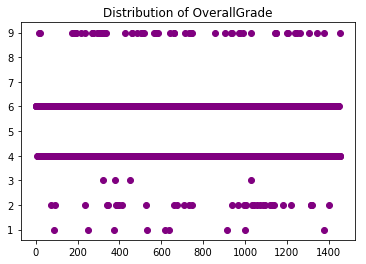

In [218]:
# 单个特征散点图：观察修改后的数据 
plt.scatter(range(data.shape[0]), data["OverallGrade"].values,color='purple')
plt.title("Distribution of OverallGrade");

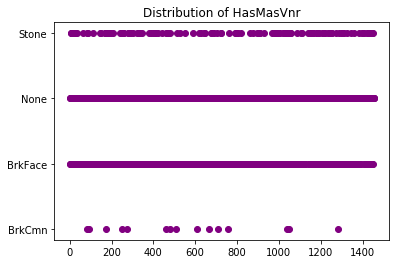

In [219]:
# 单个特征散点图：观察修改后的数据 
plt.scatter(range(data.shape[0]), data["HasMasVnr"].values,color='purple')
plt.title("Distribution of HasMasVnr");

这个数据还是原来的，没有修改成功，证明上面的语句不对。
那就再来一遍。

In [223]:
#这里直接 replace 原有数据，必须加上 , inplace=True 才会修改原始数据 
def simplifyValue(df):
    # Has masonry veneer or not
    df.HasMasVnr.replace({"BrkCmn" : 1, "BrkFace" : 1, "CBlock" : 1, 
                                                   "Stone" : 1, "None" : 0}, inplace=True)
    
    # House completed before sale or not
    df.BoughtOffPlan.replace({"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, 
                                                          "Family" : 0, "Normal" : 0, "Partial" : 1}, inplace=True)
    
    return df
data = simplifyValue(data)
test = simplifyValue(test)

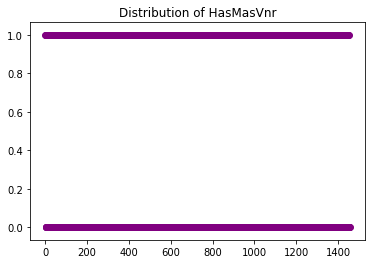

In [224]:
# 单个特征散点图：观察修改后的数据 
plt.scatter(range(data.shape[0]), data["HasMasVnr"].values,color='purple')
plt.title("Distribution of HasMasVnr");

In [226]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 65 columns):
MSSubClass        1459 non-null object
MSZoning          1455 non-null object
LotFrontage       1459 non-null float64
LotArea           1459 non-null int64
Street            1459 non-null int64
Alley             1459 non-null int64
LotShape          1459 non-null int64
LandContour       1459 non-null object
Utilities         1459 non-null int64
LotConfig         1459 non-null object
LandSlope         1459 non-null int64
Neighborhood      1459 non-null object
Condition1        1459 non-null object
Condition2        1459 non-null object
BldgType          1459 non-null object
HouseStyle        1459 non-null object
YearBuilt         1459 non-null int64
YearRemodAdd      1459 non-null int64
RoofStyle         1459 non-null object
RoofMatl          1459 non-null object
Exterior1st       1458 non-null object
Exterior2nd       1458 non-null object
MasVnrArea        1459 non-null float64
Fo

In [228]:
# 查找与分类目标相关的最重要的特征
corr = data.corr() #干嘛的？
#按房屋售价进行排序
corr.sort_values(["SalePrice"], ascending = False, inplace = True)

threshold = corr.SalePrice.iloc[11]  #the first one is SalePrice itself,from 1-11
print(threshold) 
#取前 10 个样本 
top10_cols = (corr.SalePrice[corr['SalePrice']>threshold]).axes

0.499229793243


In [229]:
# 3 现有重要特征（top 10）的多项式
def Polynomials_top10(df, top10_cols):
    for i in range(1,11):
        new_cols_2 = top10_cols[0][i] + '_s' + str(2)
        new_cols_3 = top10_cols[0][i] + '_s' + str(3)
        new_cols_sq = top10_cols[0][i] + '_sq'
        
        df[new_cols_2] = df[top10_cols[0][i]] ** 2
        df[new_cols_3] = df[top10_cols[0][i]] ** 3
        df[new_cols_sq] = np.sqrt(df[top10_cols[0][i]]) 
        
    return df

data = Polynomials_top10(data, top10_cols)
test = Polynomials_top10(test,top10_cols)

In [230]:
#对训练集的其他数值型特征进行空缺值填补（中值填补）
#返回填补后的dataframe，以及每列的中值，用于填补测试集的空缺值
# 数值型特征还要进行数据标准化
from sklearn.preprocessing import StandardScaler #用于对数据标准化

def fillna_numerical_train(df):
    numerical_features = df.select_dtypes(exclude = ["object"]).columns
    
    numerical_features = numerical_features.drop("SalePrice")
    print("Numerical features : " + str(len(numerical_features)))

    df.info()
    df_num = df[numerical_features]
    #df_num.info()
    
    medians = df_num.median() 
    # Handle remaining missing values for numerical features by using median as replacement
    print("NAs for numerical features in df : " + str(df_num.isnull().values.sum()))
    df_num = df_num.fillna(medians)
    print("Remaining NAs for numerical features in df : " + str(df_num.isnull().values.sum()))

    #df_num.info()
    # 分别初始化对特征和目标值的标准化器
    ss_X = StandardScaler()

    # 对训练特征进行标准化处理
    temp = ss_X.fit_transform(df_num)
    df_num = pd.DataFrame(data=temp, columns=numerical_features, index =df_num.index)
    
    return df_num, medians, ss_X
train_num, medians, ss_X = fillna_numerical_train(data)
# ss_X 是什么？标准化处理器

Numerical features : 72
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Data columns (total 96 columns):
MSSubClass         1456 non-null object
MSZoning           1456 non-null object
LotFrontage        1456 non-null float64
LotArea            1456 non-null int64
Street             1456 non-null int64
Alley              1456 non-null int64
LotShape           1456 non-null int64
LandContour        1456 non-null object
Utilities          1456 non-null int64
LotConfig          1456 non-null object
LandSlope          1456 non-null int64
Neighborhood       1456 non-null object
Condition1         1456 non-null object
Condition2         1456 non-null object
BldgType           1456 non-null object
HouseStyle         1456 non-null object
YearBuilt          1456 non-null int64
YearRemodAdd       1456 non-null int64
RoofStyle          1456 non-null object
RoofMatl           1456 non-null object
Exterior1st        1456 non-null object
Exterior2nd        1456 non-null obj

In [135]:
train_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Data columns (total 97 columns):
LotFrontage       1456 non-null float64
LotArea           1456 non-null float64
Street            1456 non-null float64
Alley             1456 non-null float64
LotShape          1456 non-null float64
Utilities         1456 non-null float64
LandSlope         1456 non-null float64
OverallQual       1456 non-null float64
OverallCond       1456 non-null float64
YearBuilt         1456 non-null float64
YearRemodAdd      1456 non-null float64
MasVnrArea        1456 non-null float64
ExterQual         1456 non-null float64
ExterCond         1456 non-null float64
BsmtQual          1456 non-null float64
BsmtCond          1456 non-null float64
BsmtExposure      1456 non-null float64
BsmtFinType1      1456 non-null float64
BsmtFinSF1        1456 non-null float64
BsmtFinType2      1456 non-null float64
BsmtFinSF2        1456 non-null float64
BsmtUnfSF         1456 non-null float64
TotalBsmtSF  

In [231]:
#对测试集的其他数值型特征进行空缺值填补（用训练集中相应列的中值填补）
def fillna_numerical_test(df, medians, ss_X):
    numerical_features = df.select_dtypes(exclude = ["object"]).columns
    #numerical_features = numerical_features.drop("SalePrice")  #测试集中没有SalePrice
    print("Numerical features : " + str(len(numerical_features)))

    df_num = df[numerical_features]
    
    # Handle remaining missing values for numerical features by using median as replacement
    print("NAs for numerical features in df : " + str(df_num.isnull().values.sum()))
    df_num = df_num.fillna(medians)
    print("Remaining NAs for numerical features in df : " + str(df_num.isnull().values.sum()))

    #对数值特征进行标准化
    temp = ss_X.transform(df_num)
    df_num = pd.DataFrame(data=temp, columns=numerical_features, index =df_num.index )
    return df_num

test_num = fillna_numerical_test(test, medians, ss_X)

Numerical features : 72
NAs for numerical features in df : 84
Remaining NAs for numerical features in df : 0


In [235]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 95 columns):
MSSubClass         1459 non-null object
MSZoning           1455 non-null object
LotFrontage        1459 non-null float64
LotArea            1459 non-null int64
Street             1459 non-null int64
Alley              1459 non-null int64
LotShape           1459 non-null int64
LandContour        1459 non-null object
Utilities          1459 non-null int64
LotConfig          1459 non-null object
LandSlope          1459 non-null int64
Neighborhood       1459 non-null object
Condition1         1459 non-null object
Condition2         1459 non-null object
BldgType           1459 non-null object
HouseStyle         1459 non-null object
YearBuilt          1459 non-null int64
YearRemodAdd       1459 non-null int64
RoofStyle          1459 non-null object
RoofMatl           1459 non-null object
Exterior1st        1458 non-null object
Exterior2nd        1458 non-null object
MasVnrArea         1

In [281]:
#这一段代码有问题，导致得到的数据特别大，而且特征名称都是数字了，看不出问题原因 
def get_dummies_cat(df):
    categorical_features = df.select_dtypes(include = ["object"]).columns
    print("Categorical features : " + str(len(categorical_features)))
    df_cat = df[categorical_features]

    # Create dummy features for categorical values via one-hot encoding
    print("NAs for categorical features in df : " + str(df_cat.isnull().values.sum()))
    
    #df_cat = pd.get_dummies(df_cat,dummy_na=True) 是这一行代码的问题，这一行代码没问题，是下面的问题 
    df_cat = pd.get_dummies(df_cat,dummy_na=True)
    print("Remaining NAs for categorical features in df : " + str(df_cat.isnull().values.sum()))
    
    return df_cat

#必须考虑类别型特征的取值范围（训练集和测试的取值范围可能不同）
#train_cat = get_dummies_cat(data)
# test_cat = get_dummies_cat(test)

n_train_samples = data.shape[0]  
train_test = pd.concat((data, test), axis=0)
train_test_cat = get_dummies_cat(train_test)
   
train_cat = train_test_cat.iloc[:n_train_samples, :]
test_cat = train_test_cat.iloc[n_train_samples:, :]


Categorical features : 23
NAs for categorical features in df : 8
Remaining NAs for categorical features in df : 0


In [282]:
test_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Columns: 213 entries, BldgType_1Fam to SaleType_nan
dtypes: uint8(213)
memory usage: 314.9 KB


In [283]:
# Join categorical and numerical features
def joint_num_cat(df_num, df_cat):
    #这一行会导致所有的特征名称变成 数字 去掉 , ignore_index=True 就好了  就是这一句的问题，上面代码没问题 
    #df = pd.concat([df_num, df_cat], axis = 1, ignore_index=True)
    df = pd.concat([df_num, df_cat], axis = 1)
    print("New number of features : " + str(df.shape[1]))
    
    return df

'''把数值特征 和 类别特征 连起来，但是 train_cat 太大，不对，暂时屏蔽 '''
FE_train = joint_num_cat(train_num, train_cat)
FE_test = joint_num_cat(test_num, test_cat)

FE_train = pd.concat([FE_train, data['SalePrice']], axis = 1)
FE_test = pd.concat([test_id, FE_test], axis = 1)

'''只用数值型特征 
FE_train = pd.concat([train_num, data['SalePrice']], axis = 1)
FE_test = pd.concat([test_id, test_num], axis = 1)
'''

#特征工程后的数据，写到文件
FE_train.to_csv(dpath + 'AmesHouse_FE_train.csv', index=False)
FE_test.to_csv(dpath + 'AmesHouse_FE_test.csv', index=False)

New number of features : 285
New number of features : 285


In [284]:
FE_test.info() #特征工程完成 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 286 entries, Id to SaleType_nan
dtypes: float64(72), int64(1), uint8(213)
memory usage: 1.1 MB
